In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('mordred2.csv')

In [4]:
# random forest for feature importance on a classification problem
# define dataset
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = pd.read_csv(filename)
    # retrieve numpy array
    # dataset = data
	# split into input (X) and output (y) variables
    X = data.iloc[:, 1:]
    y = data.iloc[:, [0]]
    return X, y

In [5]:
# load the dataset
X, y = load_dataset('train.csv')
# define the model
model = RandomForestClassifier(random_state=46)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
importance = list(importance)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00193
Feature: 6, Score: 0.00357
Feature: 7, Score: 0.00060
Feature: 8, Score: 0.00379
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00057
Feature: 11, Score: 0.00033
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00166
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00081
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00038
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

<ipython-input-5-5718a43f1d2d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


In [6]:
df_feat_imp = {"importance": importance}
df_feat_imp = pd.DataFrame(df_feat_imp)

In [7]:
col_names = X.columns.tolist()
df_feat_imp["feat_name"] = col_names
df_feat_imp

,importance,feat_name
0,0.000000,ABC
1,0.000000,ABCGG
2,0.000000,nAcid
3,0.000000,nBase
4,0.000000,SpAbs_A
...,...,...
1324,0.000000,WPol
1325,0.000595,Zagreb1
1326,0.000000,Zagreb2
1327,0.000327,mZagreb1


In [8]:
df_feat_imp.sort_values("importance", ascending=False, inplace=True)
df_feat_imp_gz = df_feat_imp[df_feat_imp["importance"] > 0]

In [9]:
sel_feat_name = df_feat_imp_gz["feat_name"].values.tolist()

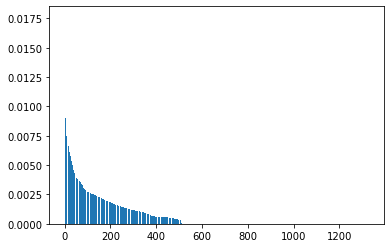

In [10]:
# sort the importance
sorted_importance = np.sort(importance)[::-1]
pyplot.bar([x for x in range(len(sorted_importance))], sorted_importance)
pyplot.show()

In [11]:
df_feat_imp_gz[:5]

,importance,feat_name
485,0.017646,GATS5p
1121,0.010234,piPC5
349,0.009093,AATSC2s
945,0.009053,ETA_shape_y
277,0.009030,ATSC3are


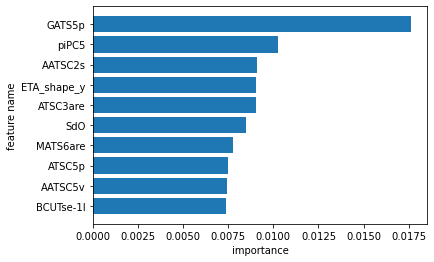

In [12]:
plt.barh(df_feat_imp_gz[:10].feat_name[::-1], df_feat_imp_gz[:10].importance[::-1])
plt.ylabel('feature name')
plt.xlabel('importance')
plt.show()

# Start Here

In [13]:
def load_data(filename, n=0, take_all=False):
    # load the dataset as a pandas DataFrame
	data = pd.read_excel(filename)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	if(take_all):
		 X = dataset[:, 1:]
	else:
		X = dataset[:, 1:n]
	y = dataset[:, 0]
	return X, y

# Test All Algorithm

In [14]:
algorithms = {}
results_normal = []
results_tuned = []
train_results_normal = []
train_results_tuned = []

## Random Forest

In [15]:
# 10%-100% Feature Importance
total_features = len(sel_feat_name)
scores = []
X, y = load_dataset('train.csv')
x_axis = []
real_x_axis = []
sel_feat_list = []
for i in range(1, 11):
    perc = i / 10;
    print('===================================================')
    print(f"Processing: {perc*100}% of total feature importance")
    n = int(total_features * perc)
    sel_feat = sel_feat_name[:n]
    sel_feat_list.append(sel_feat)
    new_X = X.loc[:,sel_feat]
    print('Training...')
    model = RandomForestClassifier(random_state=46)
    print('Predicting...')
    score = cross_val_score(model, new_X, y.values.ravel(), cv=5)
    print(f"Score: {score.mean()}")
    scores.append(score.mean())
    x_axis.append(i*10)
    real_x_axis.append(i)

Processing: 10.0% of total feature importance
Training...
Predicting...
Score: 0.6512820512820514
Processing: 20.0% of total feature importance
Training...
Predicting...
Score: 0.6346153846153846
Processing: 30.0% of total feature importance
Training...
Predicting...
Score: 0.6333333333333333
Processing: 40.0% of total feature importance
Training...
Predicting...
Score: 0.5871794871794871
Processing: 50.0% of total feature importance
Training...
Predicting...
Score: 0.65
Processing: 60.0% of total feature importance
Training...
Predicting...
Score: 0.6666666666666667
Processing: 70.0% of total feature importance
Training...
Predicting...
Score: 0.6666666666666667
Processing: 80.0% of total feature importance
Training...
Predicting...
Score: 0.6192307692307691
Processing: 90.0% of total feature importance
Training...
Predicting...
Score: 0.6512820512820514
Processing: 100.0% of total feature importance
Training...
Predicting...
Score: 0.6346153846153846


In [16]:
algorithms['random_forest'] = {
    'real_x_axis': real_x_axis,
    'scores': scores
}

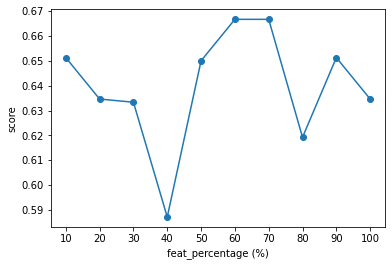

In [17]:
plt.plot(real_x_axis, scores, marker = 'o')
plt.xlabel('feat_percentage (%)')
plt.ylabel('score')
plt.xticks(real_x_axis, x_axis)
plt.show()

In [18]:
best_n_feature = np.argmax(scores)
train_results_normal.append(scores[best_n_feature])
best_sel_feat = sel_feat_list[best_n_feature]
print((best_n_feature+1)*10)
print(((best_n_feature+1)/10)*512)
print(len(best_sel_feat))

60
307.2
307


### Untuned

In [19]:
X, y = load_dataset('train.csv')
X_test, y_test = load_dataset('test.csv')
new_X = X.loc[:,best_sel_feat]
new_X_test = X_test.loc[:,best_sel_feat]
print('Training...')
model = RandomForestClassifier(random_state=46)
model.fit(new_X, y.values.ravel())
print('Predicting...')
y_pred_train = model.predict(new_X)
y_pred_test = model.predict(new_X_test)
acc_train = accuracy_score(y, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print(acc_train, acc_test)

Training...
Predicting...
1.0 0.7407407407407407


In [20]:
results_normal.append(score.mean())

In [21]:
tn, fp, fn, tp = confusion_matrix(y, model.predict(new_X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)

In [22]:
print("Untuned RF - Train")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Untuned RF - Train
tn: 37
fp: 0
fn: 0
tp: 26
recall: 1.0
precision: 1.0
f1: 1.0
accuracy: 1.0


In [23]:
tn, fp, fn, tp = confusion_matrix(y_test, model.predict(new_X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)

In [24]:
print("Untuned RF - Test")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Untuned RF - Test
tn: 11
fp: 2
fn: 5
tp: 9
recall: 0.6428571428571429
precision: 0.8181818181818182
f1: 0.72
accuracy: 0.7407407407407407


### Tuned

In [25]:
X, y = load_dataset('train.csv')
new_X = X.loc[:,best_sel_feat]

max_depth = [10*i for i in range(1, 11)]
max_depth.append(None)


hyperparameter = {
    'n_estimators': [50*i for i in range(1, 11)],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : max_depth
}
model = RandomForestClassifier(random_state=46)
grid = GridSearchCV(model, hyperparameter, cv=5, scoring='accuracy', verbose=1)
grid.fit(new_X, y.values.ravel())

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=46),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='accuracy', verbose=1)

In [26]:
print('Best param:', grid.best_params_)
print('Best score:', grid.best_score_)

Best param: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}
Best score: 0.6666666666666667


In [27]:
# tuned model
X, y = load_dataset('train.csv')
X_test, y_test = load_dataset('test.csv')
new_X = X.loc[:,best_sel_feat]
new_X_test = X_test.loc[:,best_sel_feat]
y_pred_train = grid.predict(new_X)
y_pred_test = grid.predict(new_X_test)
acc_train = accuracy_score(y, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

In [28]:
train_results_tuned.append(grid.best_score_)

In [29]:
score = cross_val_score(grid.best_estimator_, X_test, y_test, cv=5)
print(f"Score: {score.mean()}")

C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed whe

Score: 0.6266666666666667


C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [30]:
results_tuned.append(score.mean())

In [31]:
tn, fp, fn, tp = confusion_matrix(y, y_pred_train).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned RF - Train")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)
print()
tn, fp, fn, tp = confusion_matrix(y_test, grid.best_estimator_.predict(new_X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned RF - Test")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Tuned RF - Train
tn: 37
fp: 0
fn: 0
tp: 26
recall: 1.0
precision: 1.0
f1: 1.0
accuracy: 1.0

Tuned RF - Test
tn: 11
fp: 2
fn: 5
tp: 9
recall: 0.6428571428571429
precision: 0.8181818181818182
f1: 0.72
accuracy: 0.7407407407407407


## AdaBoost(Default)

In [32]:
# 10%-100% Feature Importance
total_features = len(sel_feat_name)
scores = []
X, y = load_dataset('train.csv')
x_axis = []
real_x_axis = []
sel_feat_list = []
for i in range(1, 11):
    perc = i / 10;
    print('===================================================')
    print(f"Processing: {perc*100}% of total feature importance")
    n = int(total_features * perc)
    sel_feat = sel_feat_name[:n]
    sel_feat_list.append(sel_feat)
    new_X = X.loc[:,sel_feat]
    print('Training...')
    model = AdaBoostClassifier(random_state=46)
    print('Predicting...')
    score = cross_val_score(model, new_X, y.values.ravel(), cv=5)
    print(f"Score: {score.mean()}")
    scores.append(score.mean())
    x_axis.append(i*10)
    real_x_axis.append(i)

Processing: 10.0% of total feature importance
Training...
Predicting...
Score: 0.7
Processing: 20.0% of total feature importance
Training...
Predicting...
Score: 0.6217948717948718
Processing: 30.0% of total feature importance
Training...
Predicting...
Score: 0.6179487179487179
Processing: 40.0% of total feature importance
Training...
Predicting...
Score: 0.5717948717948718
Processing: 50.0% of total feature importance
Training...
Predicting...
Score: 0.558974358974359
Processing: 60.0% of total feature importance
Training...
Predicting...
Score: 0.6038461538461538
Processing: 70.0% of total feature importance
Training...
Predicting...
Score: 0.5576923076923077
Processing: 80.0% of total feature importance
Training...
Predicting...
Score: 0.4935897435897436
Processing: 90.0% of total feature importance
Training...
Predicting...
Score: 0.5435897435897437
Processing: 100.0% of total feature importance
Training...
Predicting...
Score: 0.6064102564102564


In [33]:
algorithms['adaboost_default'] = {
    'real_x_axis': real_x_axis,
    'scores': scores
}

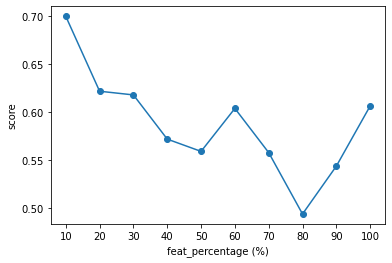

In [34]:
plt.plot(real_x_axis, scores, marker = 'o')
plt.xlabel('feat_percentage (%)')
plt.ylabel('score')
plt.xticks(real_x_axis, x_axis)
plt.show()


In [35]:
best_n_feature = np.argmax(scores)
train_results_normal.append(scores[best_n_feature])
best_sel_feat = sel_feat_list[best_n_feature]
print((best_n_feature+1)*10)
print(((best_n_feature+1)/10)*512)
print(len(best_sel_feat))

10
51.2
51


### Untuned

In [36]:
X, y = load_dataset('train.csv')
X_test, y_test = load_dataset('test.csv')
new_X = X.loc[:,best_sel_feat]
new_X_test = X_test.loc[:,best_sel_feat]
print('Training...')
model = AdaBoostClassifier(random_state=46)
model.fit(new_X, y.values.ravel())
print('Predicting...')
y_pred_train = model.predict(new_X)
y_pred_test = model.predict(new_X_test)
acc_train = accuracy_score(y, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print(acc_train, acc_test)

Training...
Predicting...
1.0 0.7037037037037037


In [37]:
results_normal.append(score.mean())

In [38]:
tn, fp, fn, tp = confusion_matrix(y, model.predict(new_X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Untuned Adaboost (Default) - Train")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)
print()
tn, fp, fn, tp = confusion_matrix(y_test, model.predict(new_X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Untuned Adaboost (Default) - Test")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Untuned Adaboost (Default) - Train
tn: 37
fp: 0
fn: 0
tp: 26
recall: 1.0
precision: 1.0
f1: 1.0
accuracy: 1.0

Untuned Adaboost (Default) - Test
tn: 11
fp: 2
fn: 6
tp: 8
recall: 0.5714285714285714
precision: 0.8
f1: 0.6666666666666666
accuracy: 0.7037037037037037


### Tuned

In [39]:
hyperparameter = {
    'n_estimators': [50*i for i in range(1, 11)],
    'learning_rate': [0.001*(10**i) for i in range(5)],
    'algorithm': ['SAMME', 'SAMME.R']
}
model = AdaBoostClassifier(random_state=46)
grid = GridSearchCV(model, hyperparameter, cv=5)
grid.fit(new_X, y.values.ravel())

C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(estimator_weight * incorrect *
C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:155: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boos

C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 130, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 506, in _boost
    return self._boost_discrete(iboost, X, y, sample_weight,
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 571,

C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.55512821 0.55512821 0.55512821 0.55512821 0.55512821 0.55512821
 0.55512821 0.55512821 0.55512821 0.55512821 0.55512821 0.58589744
 0.61666667 0.61666667 0.6        0.65       0.61794872 0.63333333
 0.58461538 0.65       0.66666667 0.65       0.68205128 0.66666667
 0.66794872 0.66794872 0.6525641  0.6525641  0.6525641  0.66794872
 0.66794872 0.65128205 0.66923077 0.65384615 0.6525641  0.62179487
 0.63846154 0.63717949 0.66923077 0.67051282        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.55512821 0.55512821 0.55512821 0.55512821
 0.55512821 0.55512821 0.55512821 0.55512821 0.55512821 0.58589744
 0.57051282 0.61923077 0.61794872 0.68333333 0.68333333 0.69871795
 0.69871795 0.69871795 0.69871795 0.69871795 0.63333333 0.68461538
 0.7        0.66923077 0.6525641  0.6525641  0.6525641  

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=46),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]})

In [40]:
print('Best param:', grid.best_params_)
print('Best score:', grid.best_score_)

Best param: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 150}
Best score: 0.7


In [41]:
# tuned model
X, y = load_dataset('train.csv')
X_test, y_test = load_dataset('test.csv')
new_X = X.loc[:,best_sel_feat]
new_X_test = X_test.loc[:,best_sel_feat]
y_pred_train = grid.predict(new_X)
y_pred_test = grid.predict(new_X_test)
acc_train = accuracy_score(y, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

In [42]:
train_results_tuned.append(grid.best_score_)

In [43]:
score = cross_val_score(grid.best_estimator_, X_test, y_test, cv=5)
print(f"Score: {score.mean()}")

C:\Users\RL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\RL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\RL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\RL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

Score: 0.6


In [44]:
results_tuned.append(score.mean())

In [45]:
tn, fp, fn, tp = confusion_matrix(y, grid.best_estimator_.predict(new_X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned Adaboost (Default) - Train")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)
print()
tn, fp, fn, tp = confusion_matrix(y_test, grid.best_estimator_.predict(new_X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned Adaboost (Default) - Test")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Tuned Adaboost (Default) - Train
tn: 37
fp: 0
fn: 0
tp: 26
recall: 1.0
precision: 1.0
f1: 1.0
accuracy: 1.0

Tuned Adaboost (Default) - Test
tn: 11
fp: 2
fn: 6
tp: 8
recall: 0.5714285714285714
precision: 0.8
f1: 0.6666666666666666
accuracy: 0.7037037037037037


## AdaBoost(RF)

In [46]:
# 10%-100% Feature Importance
# X, y = load_data('train_new.xlsx', take_all=True)
total_features = len(sel_feat_name)
scores = []
X, y = load_dataset('train.csv')
x_axis = []
real_x_axis = []
sel_feat_list = []
for i in range(1, 11):
    perc = i / 10;
    print('===================================================')
    print(f"Processing: {perc*100}% of total feature importance")
    n = int(total_features * perc)
    sel_feat = sel_feat_name[:n]
    sel_feat_list.append(sel_feat)
    new_X = X.loc[:,sel_feat]
    print('Training...')
    model = AdaBoostClassifier(RandomForestClassifier(random_state=46, criterion='entropy', n_estimators=250), random_state=46)
    print('Predicting...')
    score = cross_val_score(model, new_X, y.values.ravel(), cv=5)
    print(f"Score: {score.mean()}")
    scores.append(score.mean())
    x_axis.append(i*10)
    real_x_axis.append(i)

Processing: 10.0% of total feature importance
Training...
Predicting...
Score: 0.6679487179487179
Processing: 20.0% of total feature importance
Training...
Predicting...
Score: 0.6346153846153846
Processing: 30.0% of total feature importance
Training...
Predicting...
Score: 0.6679487179487179
Processing: 40.0% of total feature importance
Training...
Predicting...
Score: 0.6346153846153846
Processing: 50.0% of total feature importance
Training...
Predicting...
Score: 0.6358974358974359
Processing: 60.0% of total feature importance
Training...
Predicting...
Score: 0.6025641025641025
Processing: 70.0% of total feature importance
Training...
Predicting...
Score: 0.6358974358974359
Processing: 80.0% of total feature importance
Training...
Predicting...
Score: 0.6038461538461538
Processing: 90.0% of total feature importance
Training...
Predicting...
Score: 0.6358974358974359
Processing: 100.0% of total feature importance
Training...
Predicting...
Score: 0.6038461538461538


In [47]:
algorithms['adaboost_rf'] = {
    'real_x_axis': real_x_axis,
    'scores': scores
}

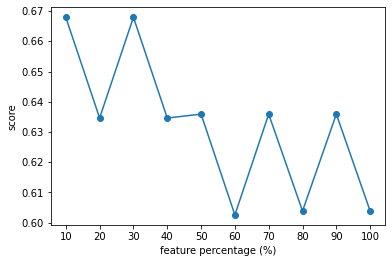

In [48]:
plt.plot(real_x_axis, scores, marker = 'o')
plt.xlabel('feature percentage (%)')
plt.ylabel('score')
plt.xticks(real_x_axis, x_axis)
plt.show()


In [49]:
best_n_feature = np.argmax(scores)
train_results_normal.append(scores[best_n_feature])
best_sel_feat = sel_feat_list[best_n_feature]
print((best_n_feature+1)*10)
print(((best_n_feature+1)/10)*512)
print(len(best_sel_feat))

10
51.2
51


### Untuned

In [50]:
# best_score_idx = np.argmax(algorithms['random_forest']['scores'])
# n_feature = int(real_x_axis[best_score_idx]* ((best_n_feature + 1)/10) * total_features)
X, y = load_dataset('train.csv')
X_test, y_test = load_dataset('test.csv')
new_X = X.loc[:,best_sel_feat]
new_X_test = X_test.loc[:,best_sel_feat]
print('Training...')
model = AdaBoostClassifier(RandomForestClassifier(random_state=46, criterion='entropy', n_estimators=250), random_state=46)
model.fit(new_X, y.values.ravel())
print('Predicting...')
y_pred_train = model.predict(new_X)
y_pred_test = model.predict(new_X_test)
acc_train = accuracy_score(y, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print(acc_train, acc_test)

Training...
Predicting...
1.0 0.7037037037037037


In [51]:
results_normal.append(score.mean())

In [52]:
tn, fp, fn, tp = confusion_matrix(y, model.predict(new_X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Untuned Adaboost (RF) - Train")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)
print()
tn, fp, fn, tp = confusion_matrix(y_test, model.predict(new_X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Untuned Adaboost (RF) - Test")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Untuned Adaboost (RF) - Train
tn: 37
fp: 0
fn: 0
tp: 26
recall: 1.0
precision: 1.0
f1: 1.0
accuracy: 1.0

Untuned Adaboost (RF) - Test
tn: 11
fp: 2
fn: 6
tp: 8
recall: 0.5714285714285714
precision: 0.8
f1: 0.6666666666666666
accuracy: 0.7037037037037037


### Tuned

In [53]:
hyperparameter = {
    'n_estimators': [50*i for i in range(1, 11)],
    'learning_rate': [0.001*(10**i) for i in range(5)],
    'algorithm': ['SAMME', 'SAMME.R']
}
model = AdaBoostClassifier(RandomForestClassifier(random_state=46, criterion='entropy', n_estimators=250), random_state=46)
grid = GridSearchCV(model, hyperparameter, cv=5)
grid.fit(new_X, y.values.ravel())

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                                                n_estimators=250,
                                                                                random_state=46),
                                          random_state=46),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]})

In [54]:
print('Best param:', grid.best_params_)
print('Best score:', grid.best_score_)

Best param: {'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}
Best score: 0.6679487179487179


In [55]:
train_results_tuned.append(grid.best_score_)

In [56]:
score = cross_val_score(grid.best_estimator_, X_test, y_test, cv=5)
print(f"Score: {score.mean()}")

C:\Users\RL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\RL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\RL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\RL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

Score: 0.6333333333333333


In [57]:
results_tuned.append(score.mean())

In [58]:
tn, fp, fn, tp = confusion_matrix(y, grid.best_estimator_.predict(new_X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned Adaboost (RF) - Train")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)
print()
tn, fp, fn, tp = confusion_matrix(y_test, grid.best_estimator_.predict(new_X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned Adaboost (RF) - Test")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Tuned Adaboost (RF) - Train
tn: 37
fp: 0
fn: 0
tp: 26
recall: 1.0
precision: 1.0
f1: 1.0
accuracy: 1.0

Tuned Adaboost (RF) - Test
tn: 11
fp: 2
fn: 6
tp: 8
recall: 0.5714285714285714
precision: 0.8
f1: 0.6666666666666666
accuracy: 0.7037037037037037


## AdaBoost(NB)

In [59]:
# 10%-100% Feature Importance
# X, y = load_data('train_new.xlsx', take_all=True)
total_features = len(sel_feat_name)
scores = []
X, y = load_dataset('train.csv')
x_axis = []
real_x_axis = []
sel_feat_list = []
for i in range(1, 11):
    perc = i / 10;
    print('===================================================')
    print(f"Processing: {perc*100}% of total feature importance")
    n = int(total_features * perc)
    sel_feat = sel_feat_name[:n]
    sel_feat_list.append(sel_feat)
    new_X = X.loc[:,sel_feat]
    print('Training...')
    model = AdaBoostClassifier(GaussianNB(), algorithm='SAMME')
    print('Predicting...')
    score = cross_val_score(model, new_X, y.values.ravel(), cv=5)
    print(f"Score: {score.mean()}")
    scores.append(score.mean())
    x_axis.append(i*10)
    real_x_axis.append(i)

Processing: 10.0% of total feature importance
Training...
Predicting...
Score: 0.5705128205128205
Processing: 20.0% of total feature importance
Training...
Predicting...
Score: 0.5538461538461539
Processing: 30.0% of total feature importance
Training...
Predicting...
Score: 0.6205128205128205
Processing: 40.0% of total feature importance
Training...
Predicting...
Score: 0.6230769230769231
Processing: 50.0% of total feature importance
Training...
Predicting...
Score: 0.5397435897435898
Processing: 60.0% of total feature importance
Training...
Predicting...
Score: 0.5051282051282052
Processing: 70.0% of total feature importance
Training...
Predicting...
Score: 0.6358974358974359
Processing: 80.0% of total feature importance
Training...
Predicting...
Score: 0.6217948717948718
Processing: 90.0% of total feature importance
Training...
Predicting...
Score: 0.5564102564102564
Processing: 100.0% of total feature importance
Training...
Predicting...
Score: 0.6217948717948718


In [60]:
algorithms['adaboost_nb'] = {
    'real_x_axis': real_x_axis,
    'scores': scores
}

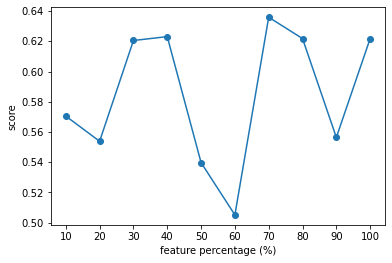

In [61]:
plt.plot(real_x_axis, scores, marker = 'o')
plt.xlabel('feature percentage (%)')
plt.ylabel('score')
plt.xticks(real_x_axis, x_axis)
plt.show()


In [62]:
best_n_feature = np.argmax(scores)
train_results_normal.append(scores[best_n_feature])
best_sel_feat = sel_feat_list[best_n_feature]
print((best_n_feature+1)*10)
print(((best_n_feature+1)/10)*512)
print(len(best_sel_feat))

70
358.4
358


### Untuned

In [63]:
# best_score_idx = np.argmax(algorithms['random_forest']['scores'])
# n_feature = int(real_x_axis[best_score_idx]* ((best_n_feature + 1)/10) * total_features)
X, y = load_dataset('train.csv')
X_test, y_test = load_dataset('test.csv')
new_X = X.loc[:,best_sel_feat]
new_X_test = X_test.loc[:,best_sel_feat]
print('Training...')
model = AdaBoostClassifier(GaussianNB(), random_state=46, algorithm='SAMME')
model.fit(new_X, y.values.ravel())
print('Predicting...')
y_pred_train = model.predict(new_X)
y_pred_test = model.predict(new_X_test)
acc_train = accuracy_score(y, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print(acc_train, acc_test)

Training...
Predicting...
0.9523809523809523 0.5185185185185185


In [64]:
results_normal.append(score.mean())

In [65]:
tn, fp, fn, tp = confusion_matrix(y, model.predict(new_X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Untuned Adaboost (NB) - Train")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)
print()
tn, fp, fn, tp = confusion_matrix(y_test, model.predict(new_X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Untuned Adaboost (NB) - Test")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Untuned Adaboost (NB) - Train
tn: 36
fp: 1
fn: 2
tp: 24
recall: 0.9230769230769231
precision: 0.96
f1: 0.9411764705882353
accuracy: 0.9523809523809523

Untuned Adaboost (NB) - Test
tn: 8
fp: 5
fn: 8
tp: 6
recall: 0.42857142857142855
precision: 0.5454545454545454
f1: 0.48
accuracy: 0.5185185185185185


### Tuned

In [66]:
hyperparameter = {
    'n_estimators': [50*i for i in range(1, 11)],
    'learning_rate': [0.001*(10**i) for i in range(5)],
    'algorithm': ['SAMME', 'SAMME.R']
}
model = AdaBoostClassifier(GaussianNB(), random_state=46, algorithm='SAMME')
grid = GridSearchCV(model, hyperparameter, cv=5)
grid.fit(new_X, y.values.ravel())

C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(estimator_weight * incorrect *
C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:155: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boos

C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 130, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 506, in _boost
    return self._boost_discrete(iboost, X, y, sample_weight,
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 571,

C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 130, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 506, in _boost
    return self._boost_discrete(iboost, X, y, sample_weight,
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 571,

C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 130, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py",

C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 130, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py",

C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 130, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py",

C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 130, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py",

C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 130, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py",

C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 130, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py",

C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 130, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\RL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py",

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=GaussianNB(),
                                          random_state=46),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]})

In [67]:
print('Best param:', grid.best_params_)
print('Best score:', grid.best_score_)

Best param: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}
Best score: 0.6358974358974359


In [68]:
train_results_tuned.append(grid.best_score_)

In [69]:
score = cross_val_score(grid.best_estimator_, X_test, y_test, cv=5)
print(f"Score: {score.mean()}")

C:\Users\RL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\RL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\RL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Score: 0.5599999999999999


C:\Users\RL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\RL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [70]:
results_tuned.append(score.mean())

In [71]:
tn, fp, fn, tp = confusion_matrix(y, grid.best_estimator_.predict(new_X)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned Adaboost (NB) - Train")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)
print()
tn, fp, fn, tp = confusion_matrix(y_test, grid.best_estimator_.predict(new_X_test)).ravel()
recall = tp/(tp + fn)
precision = tp/(tp + fp)
f1 = (2 * tp)/(2 * tp + fp + fn)
accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Tuned Adaboost (NB) - Test")
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)
print("accuracy:", accuracy)

Tuned Adaboost (NB) - Train
tn: 36
fp: 1
fn: 2
tp: 24
recall: 0.9230769230769231
precision: 0.96
f1: 0.9411764705882353
accuracy: 0.9523809523809523

Tuned Adaboost (NB) - Test
tn: 8
fp: 5
fn: 8
tp: 6
recall: 0.42857142857142855
precision: 0.5454545454545454
f1: 0.48
accuracy: 0.5185185185185185


In [72]:
confusion_matrix(y_test, grid.predict(new_X_test))

array([[8, 5],
       [8, 6]], dtype=int64)

# Plot Result

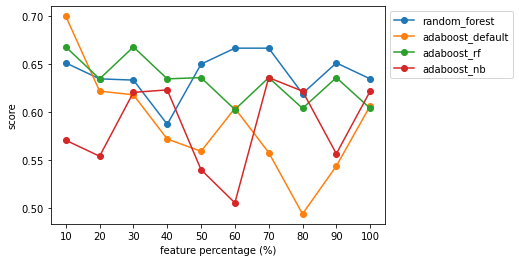

In [73]:
for algorithm in algorithms:
    plt.plot(algorithms[algorithm]['real_x_axis'], algorithms[algorithm]['scores'], label=algorithm, marker = 'o')
    
plt.xlabel('feature percentage (%)')
plt.ylabel('score')
plt.xticks(real_x_axis, x_axis)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

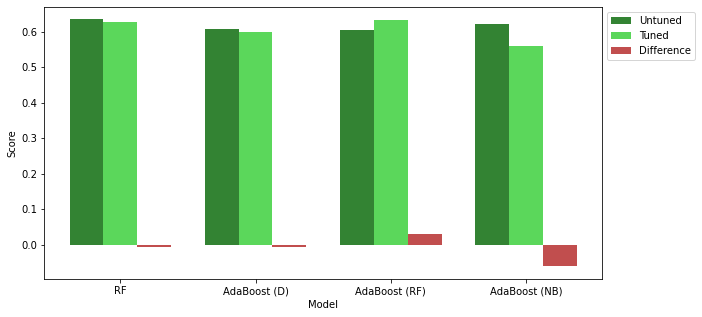

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
index = np.arange(len(results_normal))
bar_width = 0.25
opacity = 0.8


bar1 = plt.bar(index, results_normal, bar_width, alpha=opacity, color='darkgreen', label='Untuned')
bar2 = plt.bar(index + bar_width, results_tuned, bar_width, alpha=opacity, color='limegreen', label='Tuned')
bar3 = plt.bar(index + bar_width + bar_width, np.array(results_tuned) - np.array(results_normal), bar_width, alpha=opacity, color='firebrick', label='Difference')

plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(index + (bar_width), ('RF', 'AdaBoost (D)', 'AdaBoost (RF)', 'AdaBoost (NB)'))
plt.legend(bbox_to_anchor=(1, 1))

plt.show()
